### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

### Load study

In [2]:
# Define study
STUDY_NAME = "injection_oct_scan_clean"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

In [3]:

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

In [4]:
df['i_oct_b1'].unique()

array([-50., -45., -40., -35., -30., -25., -20., -15.,  20.,  25.,  30.,
        35.,  40.,  45.,  50.,  15.,  10.])

### Plot

In [5]:

# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-50,50,21)

In [6]:
# Add missing columns -10, -5, 0, 5, all filled with 7.5
df_to_plot = df_to_plot.reindex(columns=l_oct, fill_value=7.5)
df_to_plot

i_oct_b1,-50.0,-45.0,-40.0,-35.0,-30.0,-25.0,-20.0,-15.0,-10.0,-5.0,...,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
qx,,,,,,,,,,,,,,,,,,,,,
62.275,4.062,3.688,4.031,4.250,4.594,5.031,5.688,6.469,7.5,7.5,...,7.5,NaN,NaN,7.281,6.781,6.656,5.812,6.156,5.750,5.562
62.276,3.750,3.875,4.094,4.375,4.719,5.156,5.844,6.656,7.5,7.5,...,7.5,NaN,NaN,7.312,6.625,6.281,5.906,6.000,5.750,5.500
62.277,3.781,4.062,4.250,4.500,4.906,5.312,5.938,6.844,7.5,7.5,...,7.5,NaN,NaN,7.500,6.969,6.094,6.438,6.031,5.781,5.438
62.278,3.781,4.125,4.281,4.438,4.938,5.500,6.125,7.000,7.5,7.5,...,7.5,NaN,NaN,NaN,7.094,6.656,6.344,5.969,5.625,5.438
62.279,4.062,4.125,4.250,4.688,5.031,5.562,6.031,6.969,7.5,7.5,...,7.5,NaN,NaN,NaN,7.156,6.375,6.219,5.875,5.562,5.375
62.280,4.031,4.312,4.500,4.656,5.062,5.688,6.156,7.219,7.5,7.5,...,7.5,NaN,NaN,NaN,7.031,6.531,6.125,5.781,5.594,5.312
62.281,4.094,4.375,4.438,4.781,5.156,5.594,6.312,7.344,7.5,7.5,...,7.5,NaN,NaN,7.312,7.031,6.469,6.000,5.625,5.438,5.094
62.282,4.219,4.281,4.562,5.031,5.281,5.781,6.406,7.281,7.5,7.5,...,7.5,NaN,NaN,7.438,6.750,6.219,5.844,5.469,5.219,5.125
62.283,4.156,4.406,4.656,5.000,5.406,5.938,6.656,7.312,7.5,7.5,...,7.5,NaN,NaN,7.094,6.625,6.156,5.750,5.562,5.250,5.031


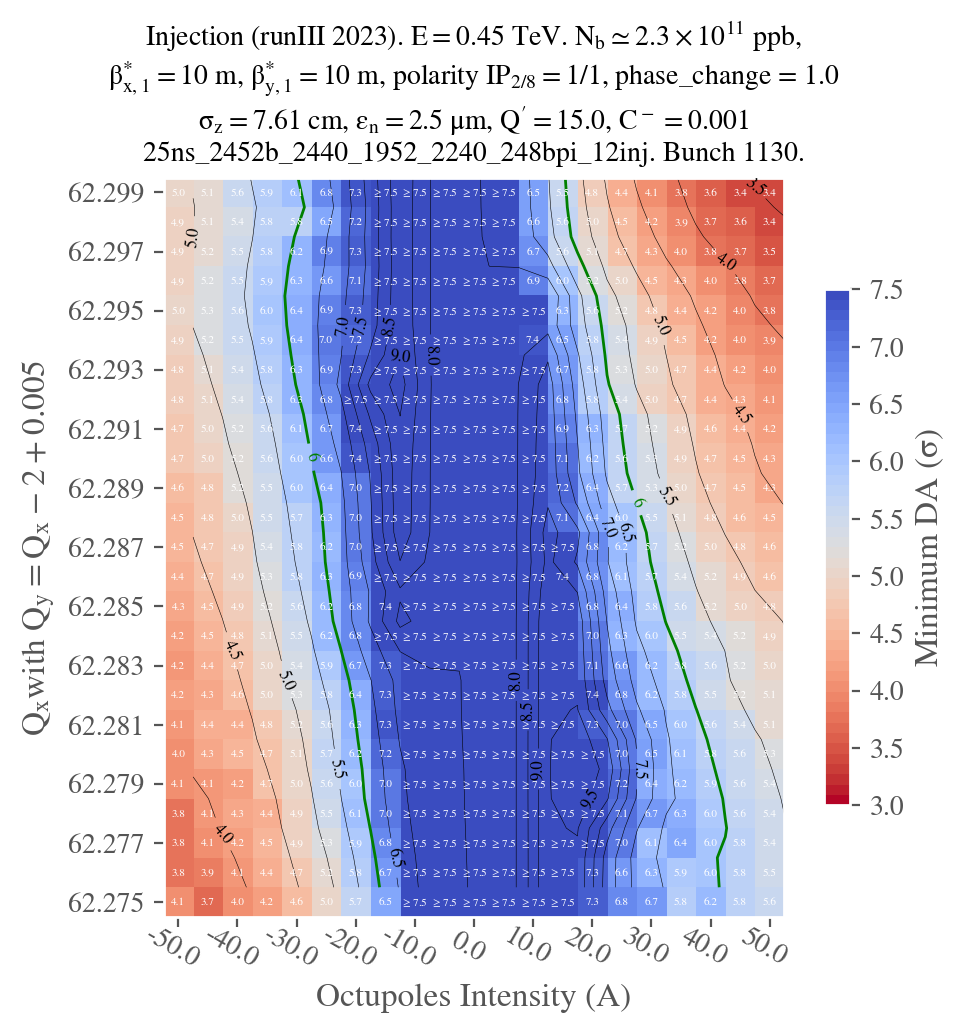

In [7]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 10,
    bety = 10,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    phase_knob=1.,
    vmin = 3,
    #title="opt_collapse_1100_1500_oct_scan",
)

### Same study with no phase knob

In [8]:
# Define study
STUDY_NAME = "injection_oct_scan_clean_no_phase_knob"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"


# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-50,50,21)

# Add missing columns -10, -5, 0, 5, all filled with 7.5
df_to_plot = df_to_plot.reindex(columns=l_oct, fill_value=7.5)
df_to_plot

i_oct_b1,-50.0,-45.0,-40.0,-35.0,-30.0,-25.0,-20.0,-15.0,-10.0,-5.0,...,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
qx,,,,,,,,,,,,,,,,,,,,,
62.275,3.812,3.500,3.688,4.000,4.375,4.781,5.406,6.281,NaN,7.5,...,NaN,6.969,6.812,6.875,6.344,5.906,5.594,5.156,5.000,4.719
62.276,3.438,3.750,3.938,4.188,4.562,5.031,5.625,6.500,NaN,7.5,...,NaN,7.312,6.750,6.594,6.156,5.812,5.281,5.000,4.844,4.656
62.277,3.562,3.781,4.000,4.312,4.656,5.125,5.719,6.125,7.375,7.5,...,NaN,7.219,6.594,6.844,6.281,5.781,5.312,5.000,4.812,4.594
62.278,3.688,3.875,4.125,4.406,4.812,5.250,5.875,6.438,7.094,7.5,...,NaN,7.500,7.375,6.812,5.875,5.656,5.406,5.031,4.812,4.594
62.279,3.750,3.875,4.219,4.500,4.875,5.344,5.625,6.469,6.781,7.5,...,NaN,7.281,7.250,6.781,6.188,5.656,5.375,5.000,4.781,4.594
62.280,3.844,3.906,4.219,4.594,5.000,5.375,5.812,6.406,7.188,7.5,...,NaN,7.438,7.375,6.844,6.125,5.688,5.312,4.938,4.688,4.469
62.281,3.812,3.969,4.219,4.562,5.031,5.375,6.031,6.594,7.125,7.5,...,NaN,NaN,7.438,6.656,5.938,5.531,5.188,4.844,4.656,4.344
62.282,3.844,4.062,4.344,4.625,5.094,5.500,5.906,6.375,7.000,7.5,...,NaN,NaN,7.500,6.531,5.906,5.438,5.062,4.750,4.562,4.375
62.283,4.000,4.188,4.344,4.812,5.031,5.781,6.031,6.469,7.219,7.5,...,NaN,NaN,7.281,6.438,5.844,5.375,5.000,4.719,4.500,4.375


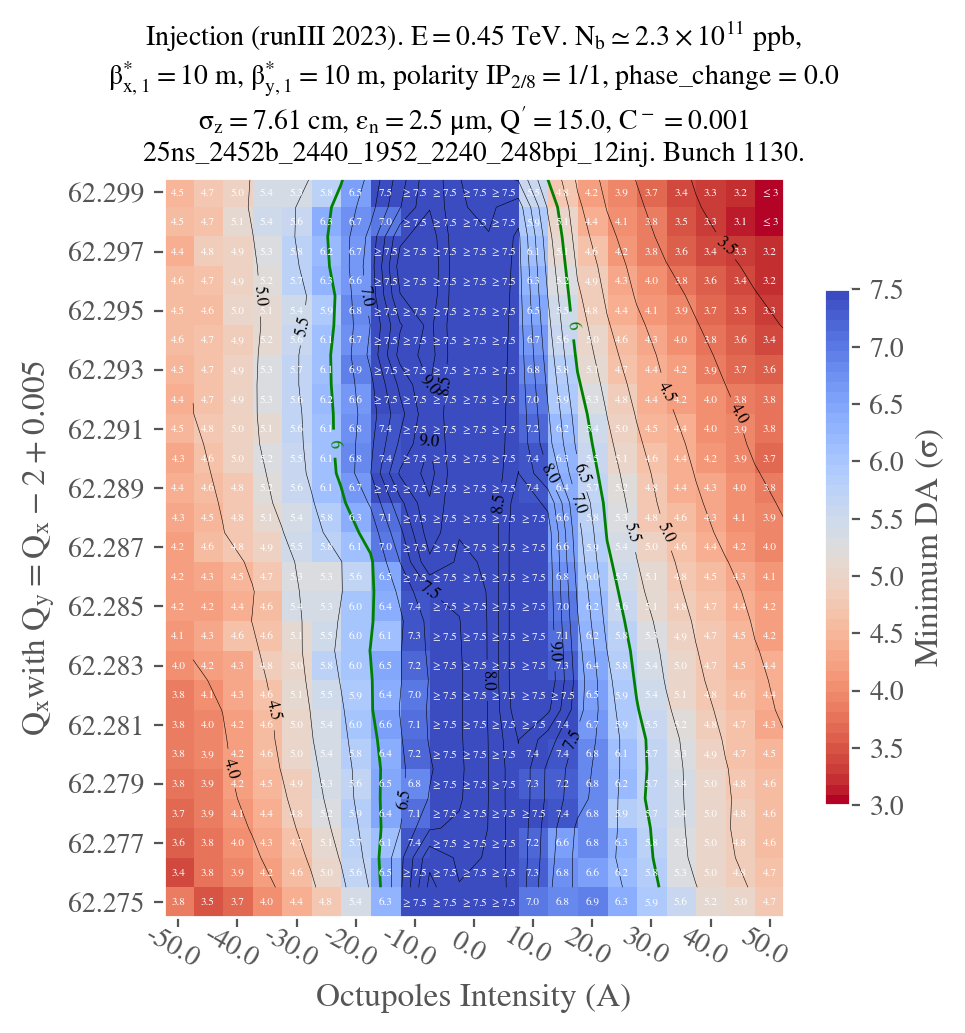

In [9]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 10,
    bety = 10,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    phase_knob=0.,
    vmin = 3,
    #title="opt_collapse_1100_1500_oct_scan",
)